## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins:
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 6 values will result in 5 bins:
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

# create dummy variables
tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
# drop old columns and concat dummy varibales with dataframe
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)

# drop NOC because of high correlation with other variables
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

In [2]:
boston_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
CRIM              506 non-null float64
ZN                506 non-null float64
INDUS             506 non-null float64
CHAS              506 non-null float64
RM                506 non-null float64
AGE               506 non-null float64
DIS               506 non-null float64
PTRATIO           506 non-null float64
B                 506 non-null float64
LSTAT             506 non-null float64
RAD_(0, 3]        506 non-null uint8
RAD_(3, 4]        506 non-null uint8
RAD_(4, 5]        506 non-null uint8
RAD_(5, 24]       506 non-null uint8
TAX_(0, 250]      506 non-null uint8
TAX_(250, 300]    506 non-null uint8
TAX_(300, 360]    506 non-null uint8
TAX_(360, 460]    506 non-null uint8
TAX_(460, 712]    506 non-null uint8
dtypes: float64(10), uint8(9)
memory usage: 44.1 KB


In [3]:
# get rid of everything that has "TAX" in the column name
boston_cont = boston_features[boston_features.columns.drop(list(boston_features.filter(regex='TAX')))]
# get rid of everything that has "RAD" in the column name
boston_cont = boston_cont[boston_cont.columns.drop(list(boston_cont.filter(regex='RAD')))]

# drop CHAS as a categorical variable
boston_cont = boston_cont.drop('CHAS', axis=1)
boston_cont.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,18.7,396.90,5.33


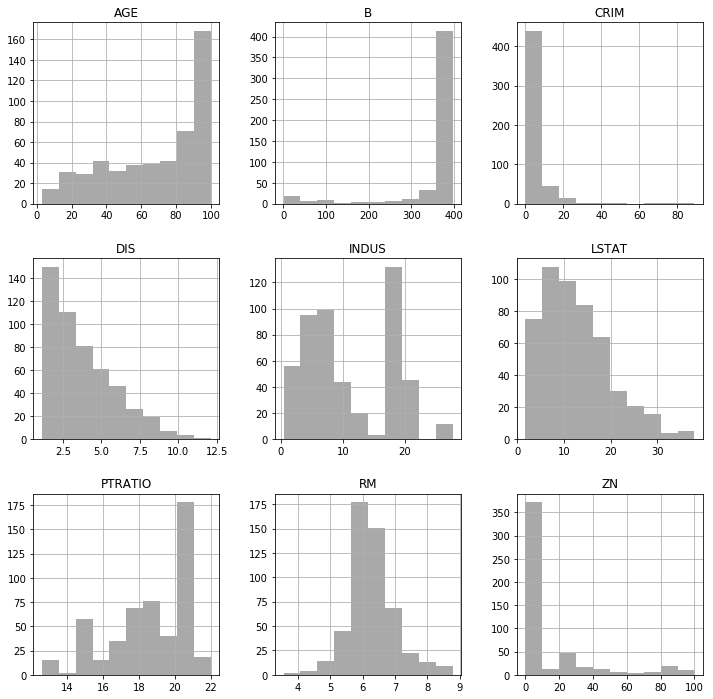

In [13]:
boston_cont.hist(figsize=(12,12), color="darkgrey");

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

In [5]:
boston_cont['ZN'].value_counts(normalize=True)

0.0      0.735178
20.0     0.041502
80.0     0.029644
12.5     0.019763
22.0     0.019763
25.0     0.019763
40.0     0.013834
45.0     0.011858
30.0     0.011858
90.0     0.009881
21.0     0.007905
95.0     0.007905
60.0     0.007905
33.0     0.007905
75.0     0.005929
35.0     0.005929
28.0     0.005929
55.0     0.005929
52.5     0.005929
70.0     0.005929
34.0     0.005929
85.0     0.003953
82.5     0.003953
17.5     0.001976
100.0    0.001976
18.0     0.001976
Name: ZN, dtype: float64

In [6]:
# We can tell that skewness is an issue for most of our variables (except RM) ...
# ... and that some features, e.g. CRIM, B, CHAS, are much bigger in scale than others.

#### ZN: This variable has a lot of null values: 73%

# **** Let's transform our data in two phases: ****
# first, let's try to make our data look more normal
# second, let's perform feature scaling to manage the difference in magnitude!

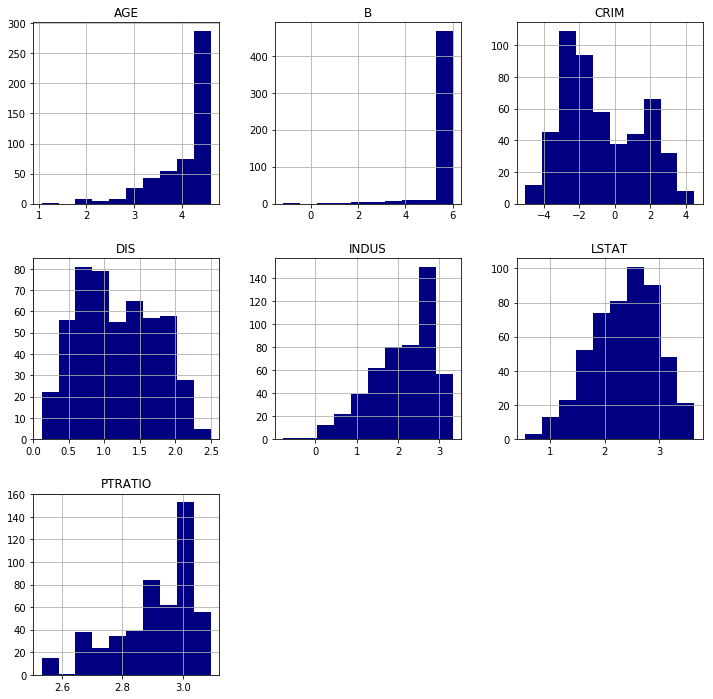

In [7]:
# Step 1: normalization to improve skewness

import numpy as np

data_log = pd.DataFrame([])

data_log["AGE"] = np.log(boston_cont["AGE"])
data_log["B"] = np.log(boston_cont["B"])
data_log["CRIM"] = np.log(boston_cont["CRIM"])
data_log["DIS"] = np.log(boston_cont["DIS"])
data_log["INDUS"] = np.log(boston_cont["INDUS"])
data_log["LSTAT"] = np.log(boston_cont["LSTAT"])
data_log["PTRATIO"] = np.log(boston_cont["PTRATIO"])
# data_log["ZN"] = np.log(boston_cont["ZN"])

data_log.hist(figsize=(12, 12), color="navy");

In [8]:
# --> CRIM, DIS, INDUS, LSTAT and PTRATIO clearly improved in becoming "more" normal
# --> AGE and B did not

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [9]:
data_log["ZN"] = np.log(boston_cont["ZN"])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [10]:
# --> "ZN" will be excluded due to its problems

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

In [11]:
# Step 2: Scaling to manage the difference in magnitude

# keep unchanged variables
age = boston_cont["AGE"]
b = boston_cont["B"]
rm = boston_cont["RM"]

# take changed variables
logcrim = data_log["CRIM"] 
logdis = data_log["DIS"]  
logindus = data_log["INDUS"] 
loglstat = data_log["LSTAT"]
logptratio = data_log["PTRATIO"]

# create final dataframe
features_final = pd.DataFrame([])

# a) Standardization
features_final["AGE"] = (age-np.mean(age))/np.sqrt(np.var(age))
features_final["B"] = (b-np.mean(b))/np.sqrt(np.var(b))

# b) Mean normalization
features_final["RM"] = (rm-np.mean(rm))/(max(rm)-min(rm))
features_final["CRIM"] = (logcrim-np.mean(logcrim))/(max(logcrim)-min(logcrim))
features_final["LSTAT"] = (loglstat-np.mean(loglstat))/(max(loglstat)-min(loglstat))

# c) Min-max scaling
features_final["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))
features_final["INDUS"] = (logindus-min(logindus))/(max(logindus)-min(logindus))
features_final["PTRATIO"] = (logptratio-min(logptratio))/(max(logptratio)-min(logptratio))

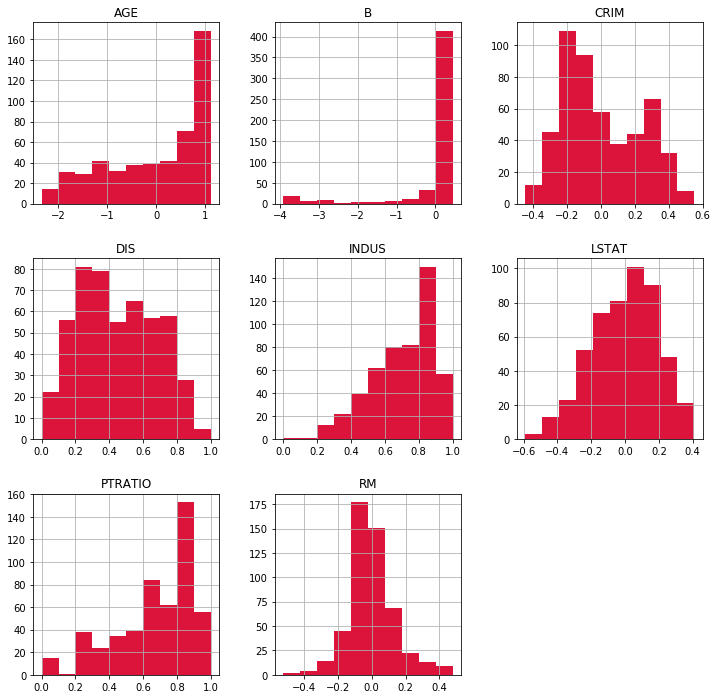

In [12]:
features_final.hist(figsize=(12, 12), color="crimson");

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.